In [1]:
%pip install pandas
import pandas as pd

# Here's our first dataset
df = pd.read_csv("Top_10000_Movies_IMDb.csv")

# Take a look at it
print("Original DataFrame:")
display(df.head())

# Drop extra columns that we don't need, because there are too many
df.drop(columns=["Link", "Runtime", "Plot"], inplace=True)

# Confirm the columns are gone
print("\nDataFrame after dropping columns:")
display(df.head())

# Save the cleaned dataset to a new file
df.to_csv("Top_10000_Movies_IMDb_Cleaned.csv", index=False)

print("Cleaned dataset saved as 'Top_10000_Movies_IMDb_Cleaned.csv'")



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Original DataFrame:


,ID,Movie Name,Rating,Runtime,Genre,Metascore,Plot,Directors,Stars,Votes,Gross,Link
0,1,The Shawshank Redemption,9.3,142 min,Drama,82.0,"Over the course of several years, two convicts...","['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469,https://www.imdb.com/title/tt0111161/
1,2,The Godfather,9.2,175 min,"Crime, Drama",100.0,"Don Vito Corleone, head of a mafia family, dec...","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411,https://www.imdb.com/title/tt0068646/
2,3,Ramayana: The Legend of Prince Rama,9.2,135 min,"Animation, Action, Adventure",NaN,An anime adaptation of the Hindu epic the Rama...,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108,https://www.imdb.com/title/tt0259534/
3,4,The Chaos Class,9.2,87 min,"Comedy, Drama",NaN,"Lazy, uneducated students share a very close b...","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785,https://www.imdb.com/title/tt0252487/
4,5,Daman,9.1,121 min,"Adventure, Drama",NaN,"The film is set in 2015. Sid, is a young docto...","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303,https://www.imdb.com/title/tt17592606/



DataFrame after dropping columns:


,ID,Movie Name,Rating,Genre,Metascore,Directors,Stars,Votes,Gross
0,1,The Shawshank Redemption,9.3,Drama,82.0,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",2752419,28341469
1,2,The Godfather,9.2,"Crime, Drama",100.0,"['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1914751,134966411
2,3,Ramayana: The Legend of Prince Rama,9.2,"Animation, Action, Adventure",NaN,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",10108,10108
3,4,The Chaos Class,9.2,"Comedy, Drama",NaN,"['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",41785,41785
4,5,Daman,9.1,"Adventure, Drama",NaN,"['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",13303,13303


Cleaned dataset saved as 'Top_10000_Movies_IMDb_Cleaned.csv'


## Rearranging the Data
-Now that we've removed extra columns we can clean up the data set by removing odd characters. 

-I noticed that the 'Stars' column had multiple names in it, so we will need to split those up.

In [2]:
import pandas as pd
import re

# The Dataset
df = pd.read_csv("Top_10000_Movies_IMDb.csv")

# Drop those columns
df.drop(columns=["Link", "Runtime", "Plot"], inplace=True)


# detect weird characters in each column
def find_weird_chars(series):
    """
    Find characters outside of:
    - Letters (including accented letters)
    - Numbers
    - Spaces and common punctuation
    """
    weird_chars = set()
    for value in series.dropna().astype(str):
        matches = re.findall(r"[^A-Za-z0-9À-ÿ\s.,:;!?'\-()&]", value)
        weird_chars.update(matches)
    return weird_chars

# clean up weird characters
def clean_text(value):
    if pd.isna(value):
        return value
    # Allow accented letters, numbers, spaces, and basic punctuation
    cleaned = re.sub(r"[^A-Za-z0-9À-ÿ\s.,:;!?'\-()&]", ' ', str(value))
    # fix weird spacing
    cleaned = re.sub(r'\s+', ' ', cleaned)
    return cleaned.strip()

# Apply to the columns
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(clean_text)

# Make a clean CSV file
df.to_csv("Top_10000_Movies_IMDb_Cleaned.csv", index=False)
print("Cleaned dataset saved as 'Top_10000_Movies_IMDb_Cleaned.csv'")

# Check for any other weird characters we missed
for col in df.columns:
    weird = find_weird_chars(df[col])
    if weird:
        print(f"Column '{col}' STILL has weird characters: {weird}")
    else:
        print(f"Column '{col}' is fully clean ✅")


Cleaned dataset saved as 'Top_10000_Movies_IMDb_Cleaned.csv'
Column 'ID' is fully clean ✅
Column 'Movie Name' is fully clean ✅
Column 'Rating' is fully clean ✅
Column 'Genre' is fully clean ✅
Column 'Metascore' is fully clean ✅
Column 'Directors' is fully clean ✅
Column 'Stars' is fully clean ✅
Column 'Votes' is fully clean ✅
Column 'Gross' is fully clean ✅


## Combining Datasets
-I merged a dataset that included gender so that we could compare movie stats based on the gender of actors.


In [ ]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("Top_10000_Movies_IMDb_Cleaned.csv")

# Split 'Stars' into lists so that one name is in each row
df['Stars'] = df['Stars'].apply(lambda x: [actor.strip() for actor in str(x).split(',') if actor.strip()])

# This is where I put the lists into separate rows so that there is one actor per row
df_exploded = df.explode('Stars').reset_index(drop=True)
df_exploded.rename(columns={'Stars': 'Actor'}, inplace=True)

# I found another dataset with more information that I could merge in order to find the genders.
import os
import urllib.request

imdb_names_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
imdb_names_path = "name.basics.tsv"

if not os.path.exists(imdb_names_path):
    print("Downloading IMDb names dataset...")
    urllib.request.urlretrieve(imdb_names_url, imdb_names_path)
    print("Download complete.")

imdb_names = pd.read_csv(imdb_names_path, sep="\t", dtype=str, low_memory=False)

# Keep only actors and actresses
imdb_names = imdb_names[imdb_names['primaryProfession'].notna()]
imdb_names['Gender'] = imdb_names['primaryProfession'].apply(
    lambda x: 'Female' if 'actress' in x.lower() else 'Male'
)

# Keep only relevant columns
imdb_names = imdb_names[['primaryName', 'Gender']]

#merge!
df_exploded = df_exploded.merge(
    imdb_names,
    left_on='Actor',
    right_on='primaryName',
    how='left'
)
df_exploded.drop(columns=['primaryName'], inplace=True)

# Replace missing genders with 'Unknown'
df_exploded['Gender'] = df_exploded['Gender'].fillna('Unknown')

print("Sample of exploded dataset with Gender column:")
display(df_exploded.head(20))


# Count male vs female actors per movie
gender_counts = (
    df_exploded.groupby(['Movie Name', 'Gender'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Double check that Male/Female columns exist
if 'Male' not in gender_counts.columns:
    gender_counts['Male'] = 0
if 'Female' not in gender_counts.columns:
    gender_counts['Female'] = 0

# Determine majority gender
def majority_gender(row):
    if row['Male'] > row['Female']:
        return 'Male'
    elif row['Female'] > row['Male']:
        return 'Female'
    else:
        return 'Tie'

gender_counts['Majority_Gender'] = gender_counts.apply(majority_gender, axis=1)

# Put this into our main dataframe
df_final = df.merge(
    gender_counts[['Movie Name', 'Majority_Gender']],
    on='Movie Name',
    how='left'
)

# Save it
df_final.to_csv("Movies_With_Gender_IMDb.csv", index=False)
print("Final dataset saved as 'Movies_With_Gender_IMDb.csv'")

# Optional: Check top 20 grossing movies by majority gender
top_grossing = df_final.sort_values(by='Gross', ascending=False).head(20)
display(top_grossing[['Movie Name', 'Gross', 'Majority_Gender']])


Sample of exploded dataset with Gender column:


,ID,Movie Name,Rating,Genre,Metascore,Directors,Actor,Votes,Gross,Gender
0,1,The Shawshank Redemption,9.3,Drama,82.0,"'Frank Darabont', 'Tim Robbins', 'Morgan Freem...",'Tim Robbins',2752419,28341469,Unknown
1,1,The Shawshank Redemption,9.3,Drama,82.0,"'Frank Darabont', 'Tim Robbins', 'Morgan Freem...",'Morgan Freeman',2752419,28341469,Unknown
2,1,The Shawshank Redemption,9.3,Drama,82.0,"'Frank Darabont', 'Tim Robbins', 'Morgan Freem...",'Bob Gunton',2752419,28341469,Unknown
3,1,The Shawshank Redemption,9.3,Drama,82.0,"'Frank Darabont', 'Tim Robbins', 'Morgan Freem...",'William Sadler',2752419,28341469,Unknown
4,2,The Godfather,9.2,"Crime, Drama",100.0,"'Francis Ford Coppola', 'Marlon Brando', 'Al P...",'Marlon Brando',1914751,134966411,Unknown
5,2,The Godfather,9.2,"Crime, Drama",100.0,"'Francis Ford Coppola', 'Marlon Brando', 'Al P...",'Al Pacino',1914751,134966411,Unknown
6,2,The Godfather,9.2,"Crime, Drama",100.0,"'Francis Ford Coppola', 'Marlon Brando', 'Al P...",'James Caan',1914751,134966411,Unknown
7,2,The Godfather,9.2,"Crime, Drama",100.0,"'Francis Ford Coppola', 'Marlon Brando', 'Al P...",'Diane Keaton',1914751,134966411,Unknown
8,3,Ramayana: The Legend of Prince Rama,9.2,"Animation, Action, Adventure",NaN,"'Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Aru...",'Yûgô Sakô',10108,10108,Unknown
9,3,Ramayana: The Legend of Prince Rama,9.2,"Animation, Action, Adventure",NaN,"'Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Aru...",'Koichi Saski',10108,10108,Unknown


Final dataset saved as 'Movies_With_Gender_IMDb.csv'


,Movie Name,Gross,Majority_Gender
887,Star Wars: Episode VII - The Force Awakens,936662225,Tie
108,Avengers: Endgame,858373000,Tie
229,Spider-Man: No Way Home,804747988,Tie
676,Avatar,760507625,Tie
152,Top Gun: Maverick,718732821,Tie
2426,Black Panther,700059566,Female
111,Avengers: Infinity War,678815482,Tie
1094,Avatar: The Way of Water,659682302,Tie
677,Titanic,659325379,Tie
4122,Jurassic World,652270625,Tie



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/1_/b_59xsl94_51l8fn3vn4gxp40000gn/T/ipykernel_7678/3906815247.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


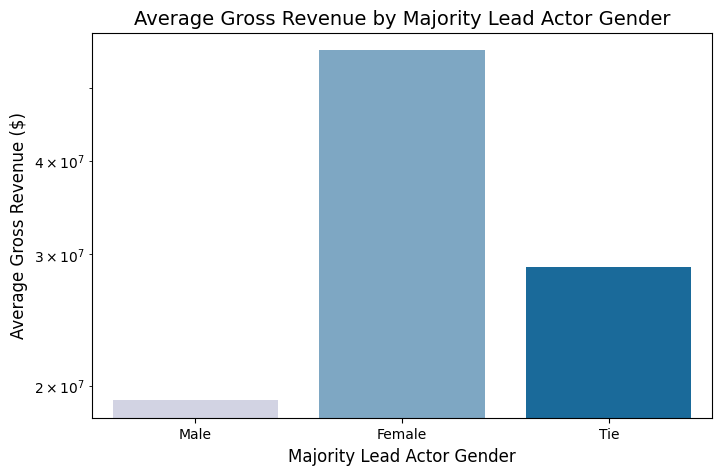

In [6]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Make a Bar chart: Average gross revenue by Majority_Gender
# ------------------------------------------------------
avg_gross = df_final.groupby('Majority_Gender')['Gross'].mean().reindex(['Male', 'Female', 'Tie'])

plt.figure(figsize=(8,5))
sns.barplot(
    x=avg_gross.index,
    y=avg_gross.values,
    palette='PuBu'
    
)
plt.title('Average Gross Revenue by Majority Lead Actor Gender', fontsize=14)
plt.ylabel('Average Gross Revenue ($)', fontsize=12)
plt.xlabel('Majority Lead Actor Gender', fontsize=12)
plt.yscale('log')  # optional
plt.show()


## What type of movie makes more on average per movie?
-Very interesting. This shows that female led movies made more on average per movie than male led or tied movies.

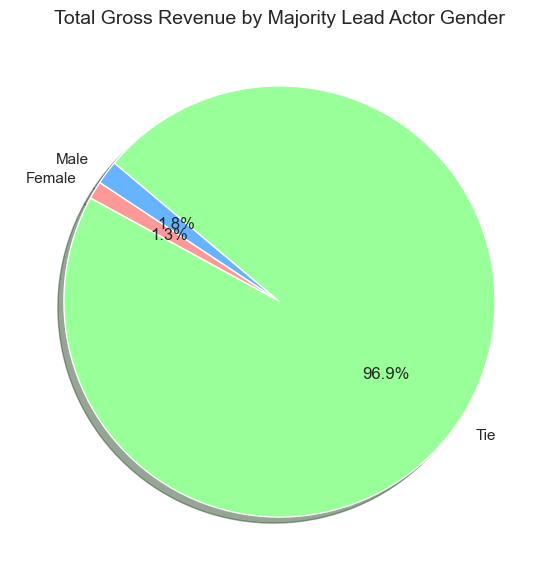

In [ ]:
import matplotlib.pyplot as plt

# Sum gross revenue by Majority_Gender
gross_by_gender = df_final.groupby('Majority_Gender')['Gross'].sum().reindex(['Male', 'Female', 'Tie']).fillna(0)

# This will look interesting in a pie chart
plt.figure(figsize=(7,7))
colors = ['#66b3ff', '#ff9999', '#99ff99']  # Male, Female, Tie

plt.pie(
    gross_by_gender.values,
    labels=gross_by_gender.index,
    autopct=lambda p: '{:.1f}%'.format(p),
    startangle=140,
    colors=colors,
    shadow=True
)

plt.title('Total Gross Revenue by Majority Lead Actor Gender', fontsize=14)
plt.show()


## Which group as a whole made more revenue?
-The whole group of each type of movie combined (male, female, tied) shows that as a group the tied set of movies made more money.

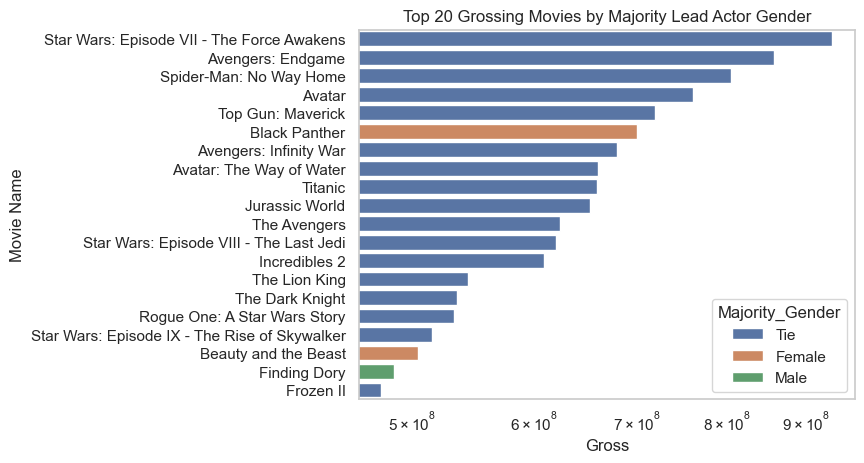

In [11]:
top_grossing = df_final.sort_values('Gross', ascending=False).head(20)
sns.barplot(x='Gross', y='Movie Name', hue='Majority_Gender', data=top_grossing, dodge=False)
plt.title("Top 20 Grossing Movies by Majority Lead Actor Gender")
plt.xscale('log')
plt.show()


## Take a look at the Top 20!
-Just for fun let's look at the Top 20 Grossing Movies by majority lead actor gender. Male dominated movies are not even on the chart, aside from Finding Dory which is kind of silly to include since it's animated.

In [10]:
# Total Gross Revenue
total_gross = df_final.groupby('Majority_Gender')['Gross'].sum()

# Average Gross Revenue per Movie
average_gross = df_final.groupby('Majority_Gender')['Gross'].mean()

print("Total Gross Revenue:")
print(total_gross)

print("\nAverage Gross Revenue:")
print(average_gross)


Total Gross Revenue:
Majority_Gender
Female      3821505468
Male        5208041624
Tie       278348394446
Name: Gross, dtype: int64

Average Gross Revenue:
Majority_Gender
Female    5.619861e+07
Male      1.914721e+07
Tie       2.881752e+07
Name: Gross, dtype: float64


In [14]:
%pip install pipreqs
%pipreqs /Users/amyamos/my_projects/Data Mid Project --force

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13783 sha256=086ccc510ac56853a0537b94de84712e9023d528b05967c31fad6e473998ff7e
  Stored in directory: /Users/amyamos/Library/Caches/pip/wheels/0b/1d/03/175286677fb5a1341cc3e4755bf8ec0ed08f3329afd67446b0
Successfully built docopt
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pipreqs]
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%pipreqs` not found.


## Summarize...
-In summary, it looks like the tied gender representation movies dominated the market financially.

-The majority female led movies were the ones that individually made more money than the male dominated or tied gender movies.